In [5]:
import pandas as pd
messages = pd.read_csv('SMSSpamCollection',sep='\t',names=['label','message'])

In [6]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
#Data cleaning and preprocessing 
import re 
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
corpus = []

for i in range(0,len(messages)):
    review = re.sub('[^a-zA-Z]'," ",messages['message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = " ".join(review)
    corpus.append(review)
    
#creating the bag of words model

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

y= pd.get_dummies(messages['label'])
y = y.iloc[:,1].values

#train test split

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state = 0)

#training model using naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train,y_train)

y_pred = spam_detect_model.predict(X_test)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [11]:
spam_detect_model.score(X_train,y_train)

0.9890060578864707

In [12]:
spam_detect_model.score(X_test,y_test)

0.9856502242152466

In [9]:
y_test

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

In [10]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=uint8)

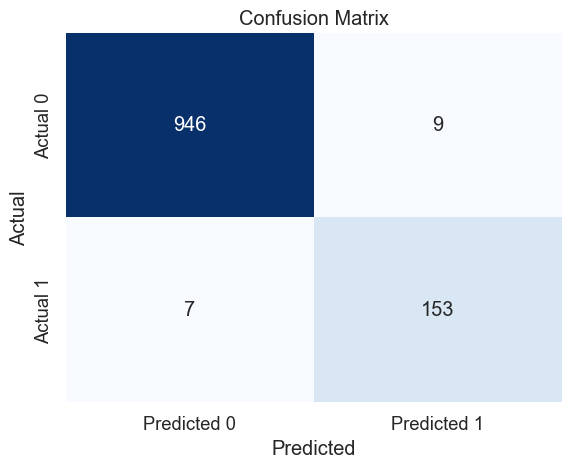

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test,y_pred)

plt.figure()
sns.heatmap(confusion_m, annot=True, fmt="d", cmap="Blues", cbar=False,
            xticklabels=["Predicted 0", "Predicted 1"],
            yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")

plt.show()

In [17]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9856502242152466